In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


In [3]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'init_rec_frac']+ \
    [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [4]:
network_model = SEIRNetworkModel(10**5)

beta = 0.2 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

init_rec_frac_arr = np.arange(0, 0.3, 0.01)
beta_arr = np.arange(0.1, 0.35, 0.01)
for beta in tqdm.tqdm(beta_arr):
    for init_rec_frac in init_rec_frac_arr:
        res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
        sample = [beta, gamma, delta, init_inf_frac, init_rec_frac] + res.daily_incidence
        dataset.loc[len(dataset)] = sample

100%|██████████| 25/25 [42:41<00:00, 102.46s/it]


In [5]:
dataset.to_csv('../data/network_model_dataset.csv')

In [6]:
dataset

,beta,gamma,delta,init_inf_frac,init_rec_frac,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
0,0.10,0.3,0.2,0.0001,0.00,0.0,99.0,267.0,524.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,0.3,0.2,0.0001,0.01,0.0,81.0,158.0,199.0,275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,0.3,0.2,0.0001,0.02,0.0,49.0,130.0,213.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,0.3,0.2,0.0001,0.03,0.0,101.0,218.0,322.0,382.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.10,0.3,0.2,0.0001,0.04,0.0,88.0,178.0,274.0,346.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.34,0.3,0.2,0.0001,0.25,0.0,128.0,278.0,385.0,457.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.34,0.3,0.2,0.0001,0.26,0.0,121.0,335.0,410.0,525.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,0.34,0.3,0.2,0.0001,0.27,0.0,139.0,256.0,304.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,0.34,0.3,0.2,0.0001,0.28,0.0,130.0,349.0,506.0,575.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


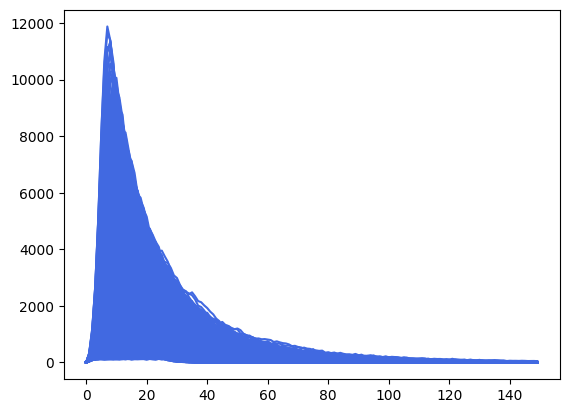

In [42]:
for i in range(len(dataset)):
    plt.plot(dataset.values[i][5:], color='RoyalBlue')

R_0 =  1.0


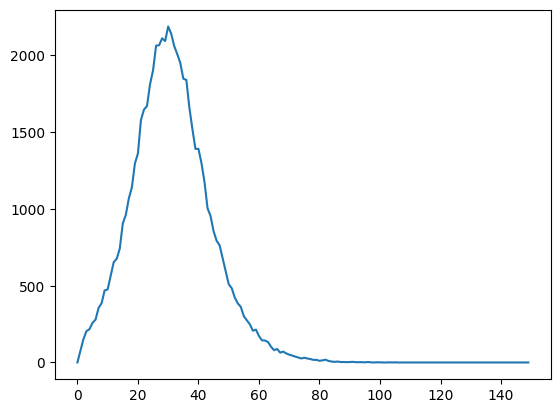

In [34]:
beta = 0.2 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected
print('R_0 = ', beta/delta)

res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
plt.plot(res.daily_incidence)